In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as ms
%matplotlib inline

In [2]:
tit=pd.read_csv('titanic.csv')
tit.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


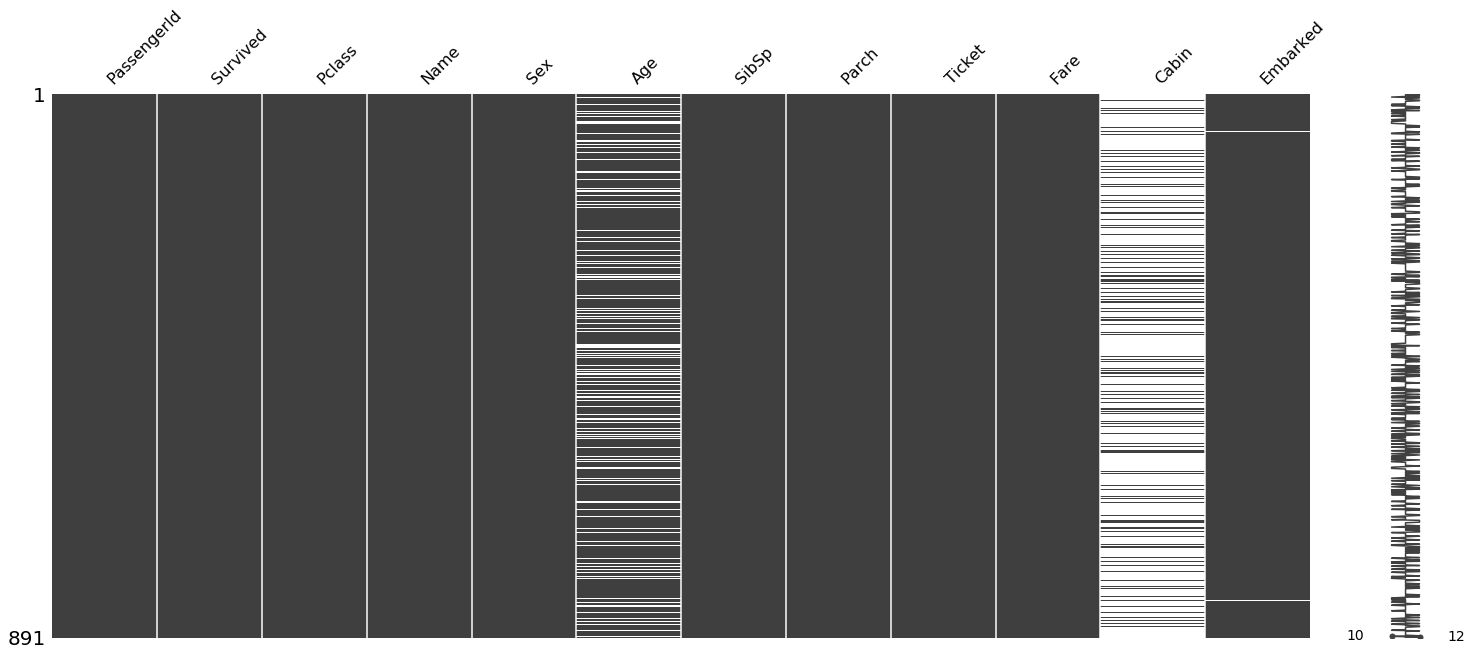

In [3]:
ms.matrix(tit)

In [4]:
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


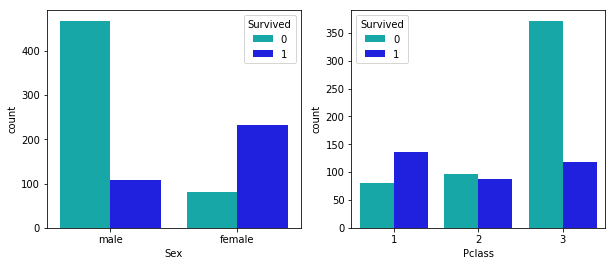

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1) 
sns.countplot(x='Sex',data=tit,hue='Survived',palette={0:'c',1:'b'})
plt.subplot(1,2,2)
sns.countplot(x='Pclass',data=tit,hue='Survived',palette={0:'c',1:'b'})

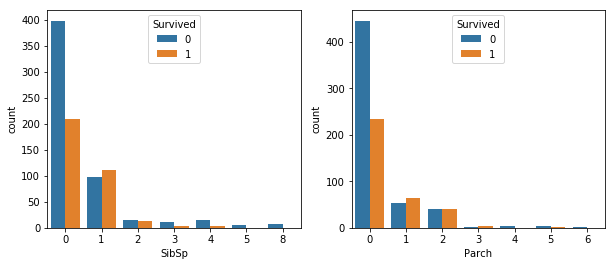

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='SibSp',data=tit,hue='Survived')#sibsp-sibling/spouse
plt.subplot(1,2,2)
sns.countplot(x='Parch',data=tit,hue='Survived')#parch-parent/children

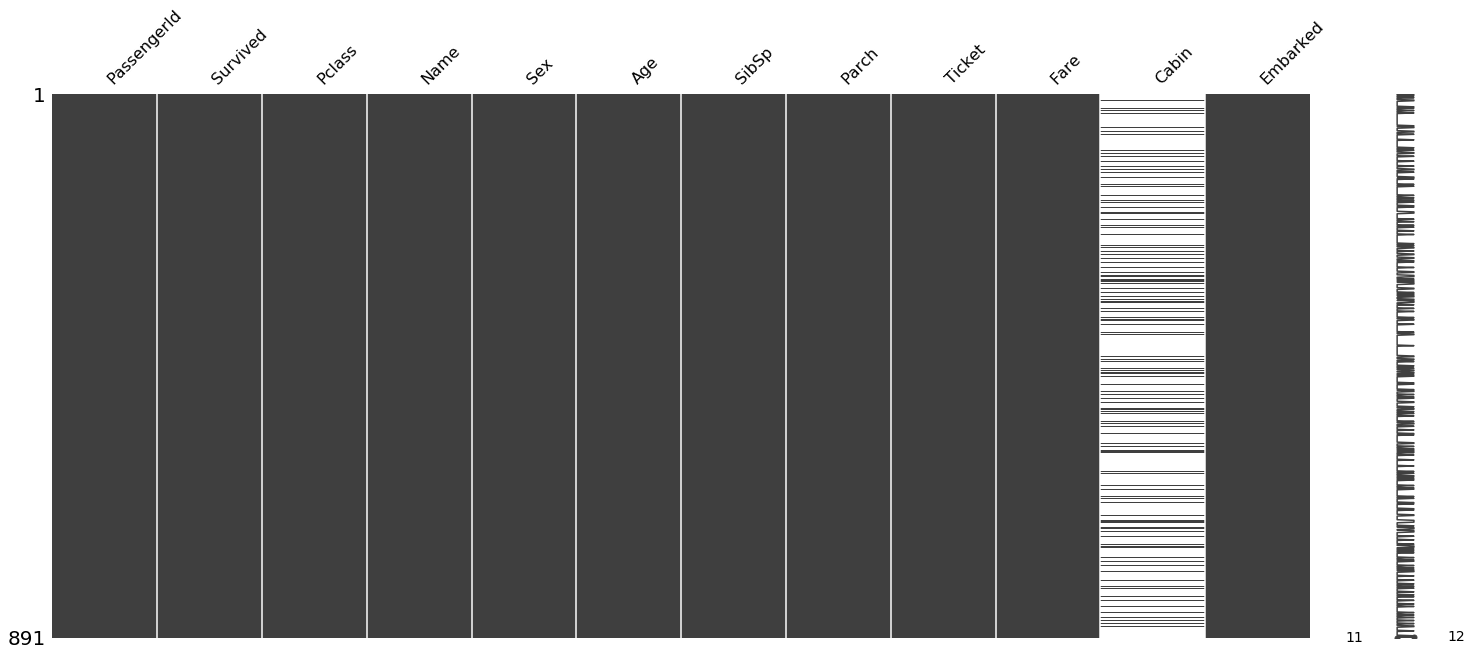

In [7]:
x=tit["Age"].median()
tit["Age"].fillna(x,inplace=True)
tit["Embarked"]=tit["Embarked"].fillna("S")# as s is the most occuring value
ms.matrix(tit)

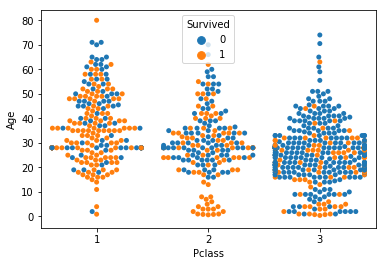

In [8]:
sns.swarmplot(x='Pclass',y='Age',hue='Survived',data=tit)

#### From the above swarm plot it can be interpreted that children(i.e., people who are below 18) have more chances to survive, so they are grouped as follows

In [9]:
tit.loc[tit["Age"]<18,"Age"]=1
tit.loc[tit["Age"]>=18,"Age"]=0

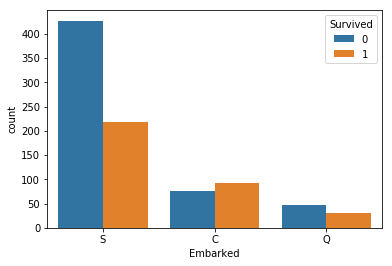

In [10]:
sns.countplot(x="Embarked",hue="Survived",data=tit)

In [11]:
tit.loc[tit["Embarked"]=="S","Embarked"]=0
tit.loc[tit["Embarked"]=="C","Embarked"]=1
tit.loc[tit["Embarked"]=="Q","Embarked"]=2

In [12]:
tit.loc[tit["Sex"]=="male","Sex"]=0
tit.loc[tit["Sex"]=="female","Sex"]=1

In [13]:
tit[tit["Age"]==1]["Survived"].value_counts(normalize=True)#shows the survival rate of children

1    0.539823
0    0.460177
Name: Survived, dtype: float64

In [14]:
tit["Family"]=tit["Parch"]+tit["SibSp"]+1 #As siblings,spouse,parent and children are considered as a family of person,a seperate column is created
#person with large family have less chances to survive

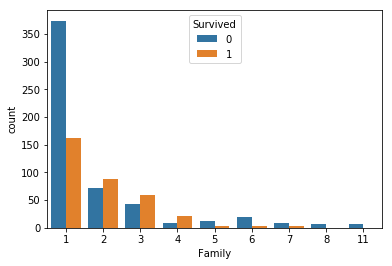

In [15]:
sns.countplot(x="Family",hue="Survived",data=tit)

In [16]:
tit.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,0.0,1,0,A/5 21171,7.2500,NaN,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,0.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,0.0,0,0,373450,8.0500,NaN,0,1
5,6,0,3,"Moran, Mr. James",0,0.0,0,0,330877,8.4583,NaN,2,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,0.0,0,0,17463,51.8625,E46,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,1.0,3,1,349909,21.0750,NaN,0,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,0.0,0,2,347742,11.1333,NaN,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1.0,1,0,237736,30.0708,NaN,1,2


#### * In the 7th observation the person has master in his name. We classified mr(male) and miss,mrs(female) but i found it something different
#### * so all the people with master in their name are into one grp and others are in second grp

In [17]:
tit["Name"]=tit["Name"].apply(lambda x:1 if "Master" in x else 0)
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,0,0,0.0,1,0,A/5 21171,7.2500,NaN,0,2
1,2,1,1,0,1,0.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,0,1,0.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,0,1,0.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,0,0.0,0,0,373450,8.0500,NaN,0,1


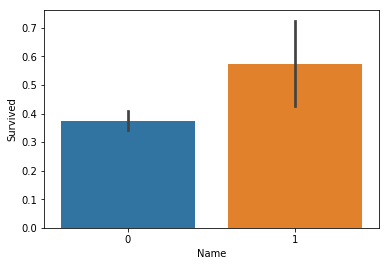

In [18]:
sns.barplot(x='Name',y='Survived',data=tit)

#### from the above plot survival rate of people ,whose name has master in them is higher than others
#### so it is understood that they got higher preference

In [19]:
tit.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,0,0,0.0,1,0,A/5 21171,7.2500,NaN,0,2
1,2,1,1,0,1,0.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,0,1,0.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,0,1,0.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,0,0.0,0,0,373450,8.0500,NaN,0,1
5,6,0,3,0,0,0.0,0,0,330877,8.4583,NaN,2,1
6,7,0,1,0,0,0.0,0,0,17463,51.8625,E46,0,1
7,8,0,3,1,0,1.0,3,1,349909,21.0750,NaN,0,5
8,9,1,3,0,1,0.0,0,2,347742,11.1333,NaN,0,3
9,10,1,2,0,1,1.0,1,0,237736,30.0708,NaN,1,2


#### done with the processing of data ,lets start training the model

In [25]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
X=tit[["Age","Sex","Fare","Pclass","Embarked","Family","Name"]].values
Y=tit["Survived"].values

In [27]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=1/3,random_state=1)

In [31]:
tree=DecisionTreeClassifier(max_depth=9,min_samples_split=10,random_state=1)
tree.fit(X_train,Y_train)
predt=tree.predict(X_val)
score=accuracy_score(Y_val,predt)
print(score)

0.8047138047138047


In [32]:
print(tree.feature_importances_)

[0.00699382 0.48650563 0.14824437 0.13697995 0.02514031 0.1261482
 0.06998772]


#### the above result is the importance of each feature passed to model

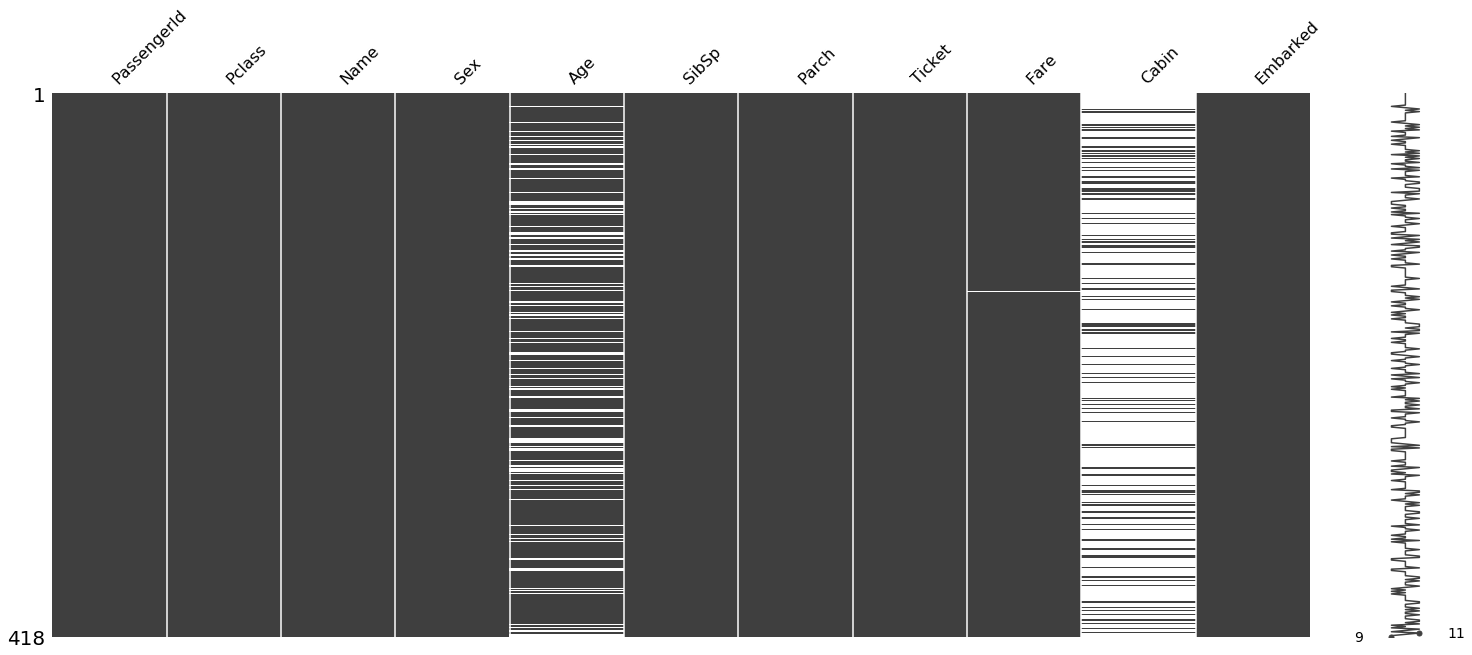

In [33]:
tit_test=pd.read_csv("test.csv")
ms.matrix(tit_test)

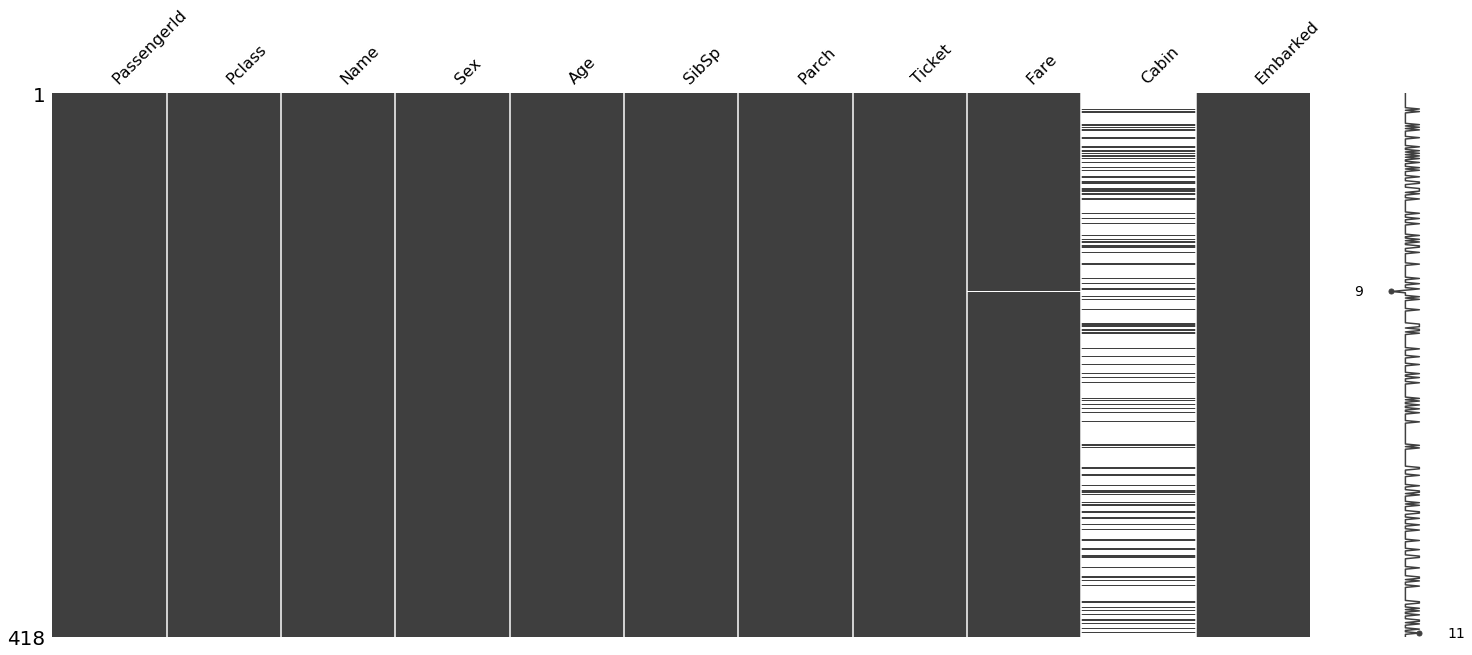

In [34]:
xt=tit_test["Age"].median()
tit_test["Age"].fillna(xt,inplace=True)
tit_test["Embarked"]=tit_test["Embarked"].fillna("S")
ms.matrix(tit_test)

#### it is observed that fare has an empty value so fill it with median

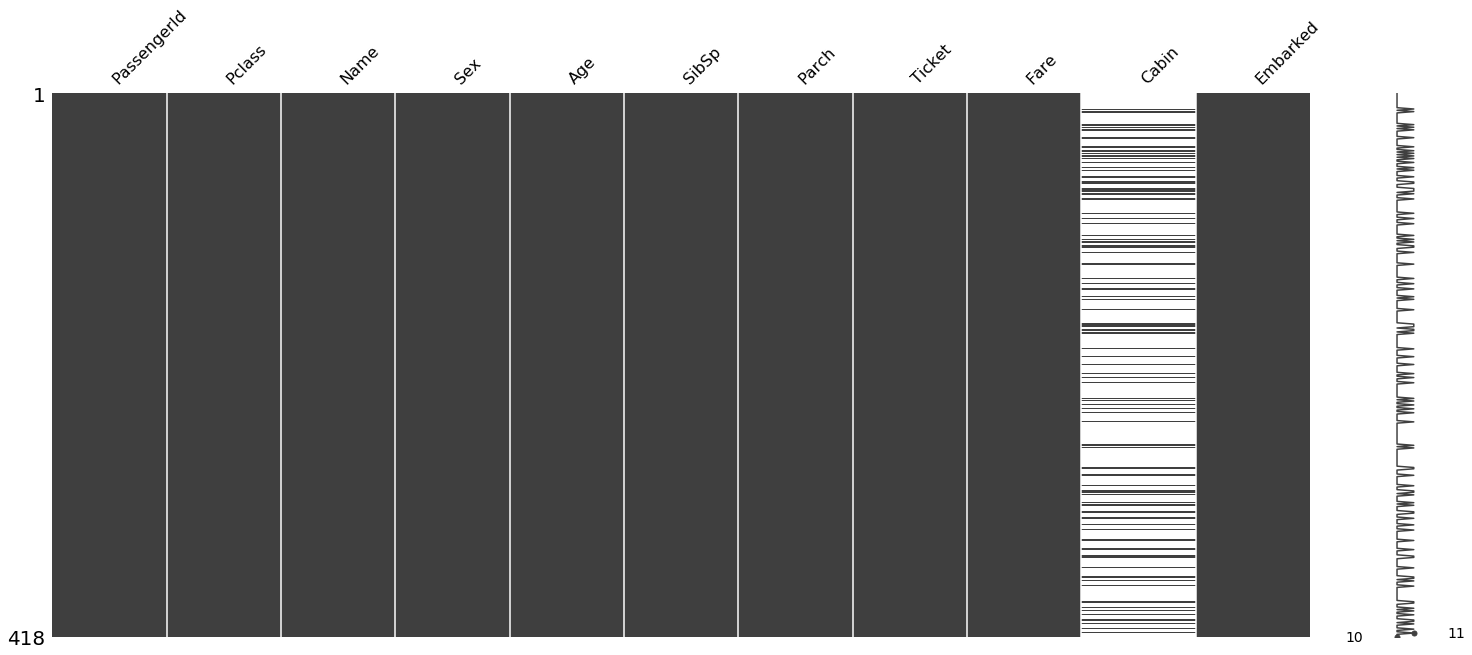

In [35]:
y=tit_test["Fare"].median()
tit_test["Fare"].fillna(y,inplace=True)
ms.matrix(tit_test)

In [36]:
tit_test.loc[tit_test["Sex"]=="male","Sex"]=0
tit_test.loc[tit_test["Sex"]=="female","Sex"]=1
tit_test.loc[tit_test["Embarked"]=="S","Embarked"]=0
tit_test.loc[tit_test["Embarked"]=="C","Embarked"]=1
tit_test.loc[tit_test["Embarked"]=="Q","Embarked"]=2
tit_test.loc[tit_test["Age"]<18,"Age"]=1
tit_test.loc[tit_test["Age"]>=18,"Age"]=0
tit_test["Family"]=tit_test["Parch"]+tit_test["SibSp"]+1
tit_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",0,0.0,0,0,330911,7.8292,NaN,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0.0,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,0.0,0,0,240276,9.6875,NaN,2,1
3,895,3,"Wirz, Mr. Albert",0,0.0,0,0,315154,8.6625,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0.0,1,1,3101298,12.2875,NaN,0,3
5,897,3,"Svensson, Mr. Johan Cervin",0,1.0,0,0,7538,9.2250,NaN,0,1
6,898,3,"Connolly, Miss. Kate",1,0.0,0,0,330972,7.6292,NaN,2,1
7,899,2,"Caldwell, Mr. Albert Francis",0,0.0,1,1,248738,29.0000,NaN,0,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,0.0,0,0,2657,7.2292,NaN,1,1
9,901,3,"Davies, Mr. John Samuel",0,0.0,2,0,A/4 48871,24.1500,NaN,0,3


In [37]:
tit_test["Name"]=tit_test["Name"].apply(lambda x:1 if "Master" in x else 0)

In [38]:
Xt=tit_test[["Age","Sex","Fare","Pclass","Embarked","Family","Name"]].values
Yt=tree.predict(Xt)
PassengerId =np.array(tit_test["PassengerId"]).astype(int)
pred_t= pd.DataFrame(Yt,PassengerId, columns = ["Survived"])
pred_t.to_csv("pred_t.csv",index_label=["PassengerId"])

In [39]:
pd.read_csv("pred_t.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB
